# EDA - Car Price Prediction (Option A)

This notebook explores the processed car sale ads dataset and produces the same visual set used in the project report. Run after generating the processed parquet via `python3 -m src.pipeline`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from src import config
from src.utils import ensure_directory


In [4]:
processed_path = config.PROCESSED_DATA_PATH
print(f'Loading processed data from {processed_path}')
if not processed_path.exists():
    raise FileNotFoundError('Run python3 -m src.pipeline first to create processed data.')
df = pd.read_parquet(processed_path)
df.shape


Loading processed data from artifacts/processed/car_ads_processed.parquet


(207263, 58)

In [5]:
display(df.head())
df.dtypes


,price,currency,condition,brand,model,version,generation,production_year,mileage_km,power_hp,...,feat_automatic_air_conditioning,feat_isofix,feat_front_side_airbags,feat_fog_lights,feat_electric_rear_windows,is_first_owner,vehicle_age,mileage_per_year,brand_popularity,model_popularity
0,86200,PLN,New,Abarth,595,Unknown,Unknown,2021,1.0,145.0,...,0,0,0,0,0,0,0.5,2.000000,0.000285,0.393582
1,43500,PLN,Used,Abarth,Other,Unknown,Unknown,1974,59000.0,75.0,...,0,0,0,0,0,0,47.0,1255.319149,0.000285,0.393582
2,44900,PLN,Used,Abarth,500,Unknown,Unknown,2018,52000.0,180.0,...,1,0,0,0,0,0,3.0,17333.333333,0.000285,0.003020
3,39900,PLN,Used,Abarth,500,Unknown,Unknown,2012,29000.0,160.0,...,1,0,1,0,0,0,9.0,3222.222222,0.000285,0.003020
4,97900,PLN,New,Abarth,595,Unknown,Unknown,2021,600.0,165.0,...,1,1,1,0,0,0,0.5,1200.000000,0.000285,0.393582


price                                            int64
currency                                        object
condition                                       object
brand                                           object
model                                           object
version                                         object
generation                                      object
production_year                                  int64
mileage_km                                     float64
power_hp                                       float64
displacement_cm3                               float64
fuel_type                                       object
co2_emissions                                  float64
drive                                           object
transmission                                    object
vehicle_type                                    object
doors_number                                     int64
colour                                          object
origin_cou

In [6]:
missing = df.isna().mean().sort_values(ascending=False)
missing.head(12)


first_registration_date    0.58517
price                      0.00000
condition                  0.00000
brand                      0.00000
model                      0.00000
version                    0.00000
generation                 0.00000
production_year            0.00000
mileage_km                 0.00000
currency                   0.00000
power_hp                   0.00000
displacement_cm3           0.00000
dtype: float64

Set plotting defaults and ensure figure directory exists.

In [5]:
fig_dir = config.FIGURES_DIR
ensure_directory(fig_dir)
sns.set_theme(style='ticks')


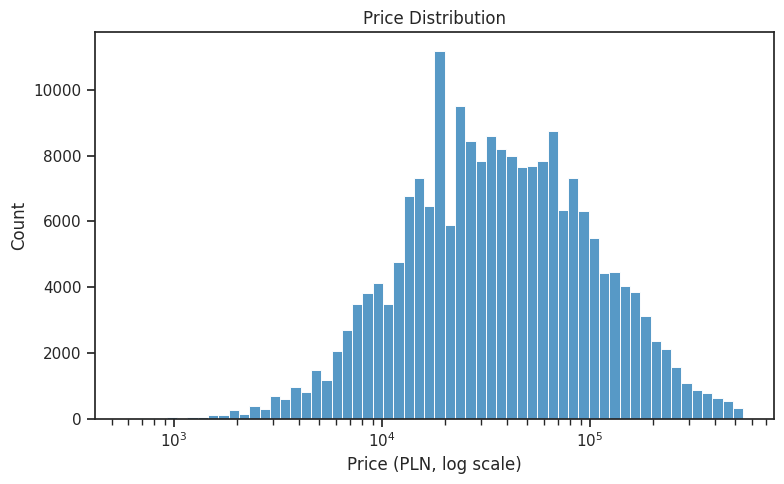

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price_pln'], bins=60, log_scale=True, color='#1f77b4')
plt.xlabel('Price (PLN, log scale)')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.tight_layout()
plt.savefig(fig_dir / 'price_distribution.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_94540/3652251088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')


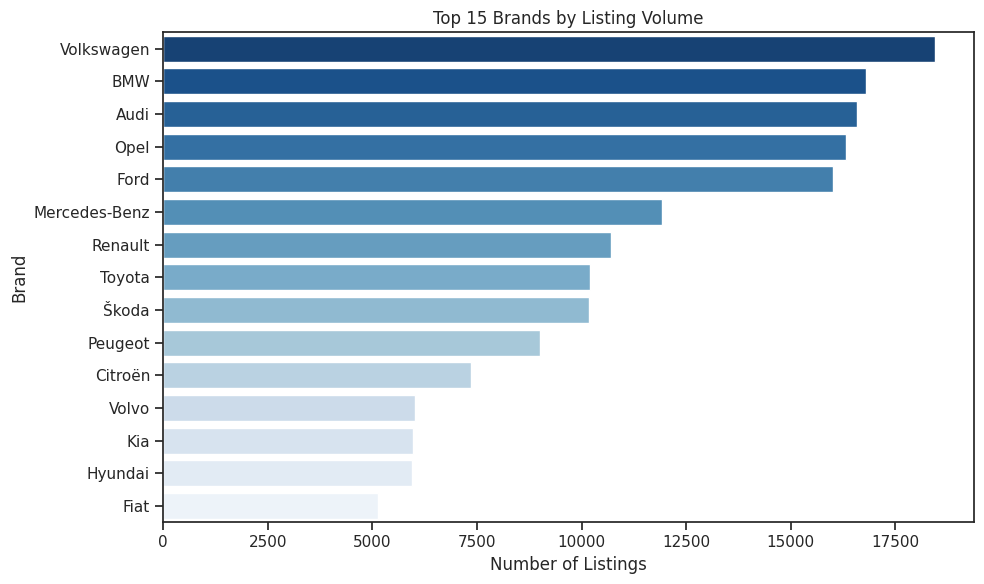

In [7]:
top_brands = df['brand'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.title('Top 15 Brands by Listing Volume')
plt.tight_layout()
plt.savefig(fig_dir / 'top_brands.png', bbox_inches='tight')
plt.show()


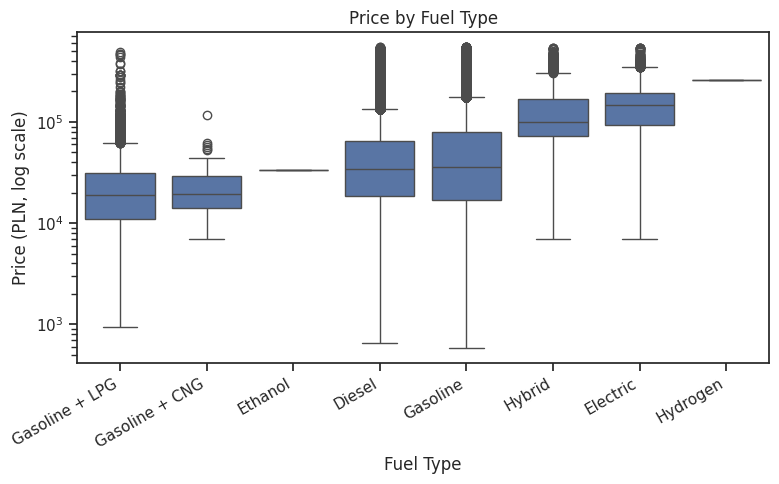

In [8]:
plt.figure(figsize=(8, 5))
order = df.groupby('fuel_type')['price_pln'].median().sort_values().index
sns.boxplot(data=df, x='fuel_type', y='price_pln', order=order)
plt.xticks(rotation=30, ha='right')
plt.yscale('log')
plt.xlabel('Fuel Type')
plt.ylabel('Price (PLN, log scale)')
plt.title('Price by Fuel Type')
plt.tight_layout()
plt.savefig(fig_dir / 'price_by_fuel.png', bbox_inches='tight')
plt.show()


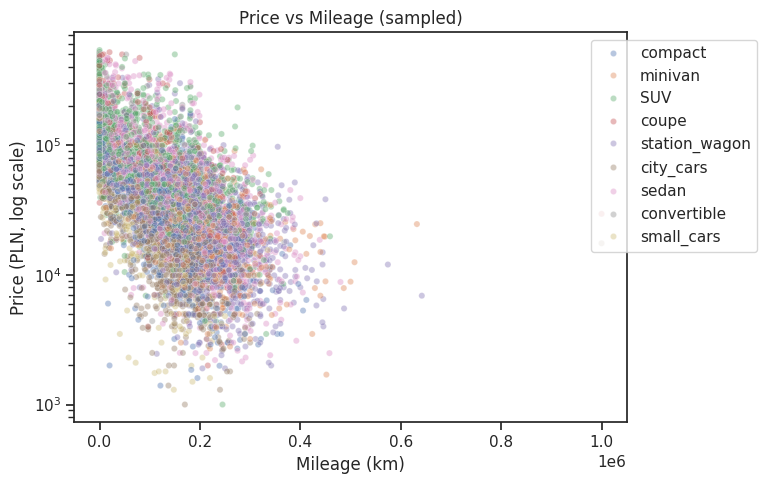

In [9]:
sample = df.sample(min(len(df), 8000), random_state=42)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample, x='mileage_km', y='price_pln', hue='vehicle_type', alpha=0.4, s=20)
plt.yscale('log')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (PLN, log scale)')
plt.title('Price vs Mileage (sampled)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.savefig(fig_dir / 'price_vs_mileage.png', bbox_inches='tight')
plt.show()


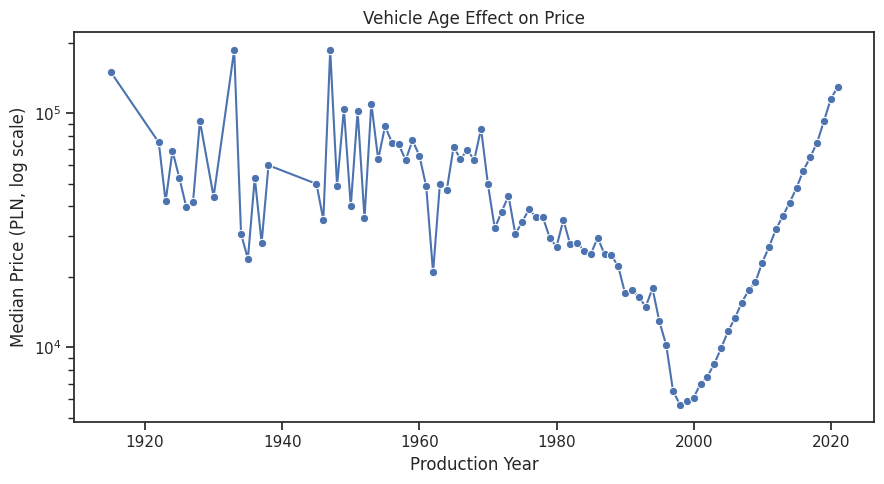

In [10]:
grouped = df.groupby('production_year')['price_pln'].median().reset_index()
plt.figure(figsize=(9, 5))
sns.lineplot(data=grouped, x='production_year', y='price_pln', marker='o')
plt.yscale('log')
plt.xlabel('Production Year')
plt.ylabel('Median Price (PLN, log scale)')
plt.title('Vehicle Age Effect on Price')
plt.tight_layout()
plt.savefig(fig_dir / 'age_effect.png', bbox_inches='tight')
plt.show()


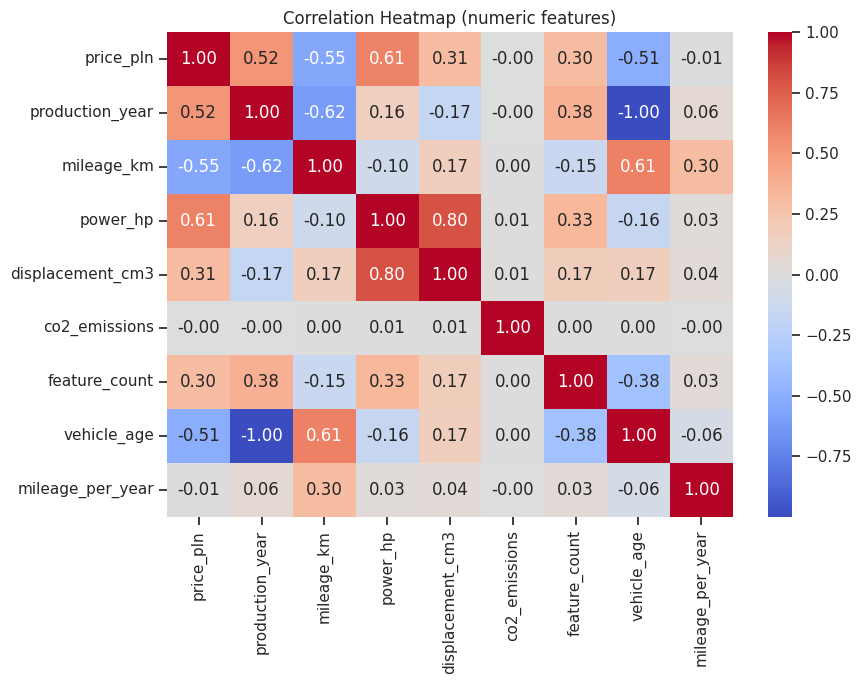

In [11]:
numeric_cols = [
    'price_pln',
    'production_year',
    'mileage_km',
    'power_hp',
    'displacement_cm3',
    'co2_emissions',
    'feature_count',
    'vehicle_age',
    'mileage_per_year',
]
corr = df[numeric_cols].corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap (numeric features)')
plt.tight_layout()
plt.savefig(fig_dir / 'correlation_heatmap.png', bbox_inches='tight')
plt.show()


## Depreciation curves by brand and age

Median price as a percentage of the brand's age-0 median (top 10 brands, ages 0–15).

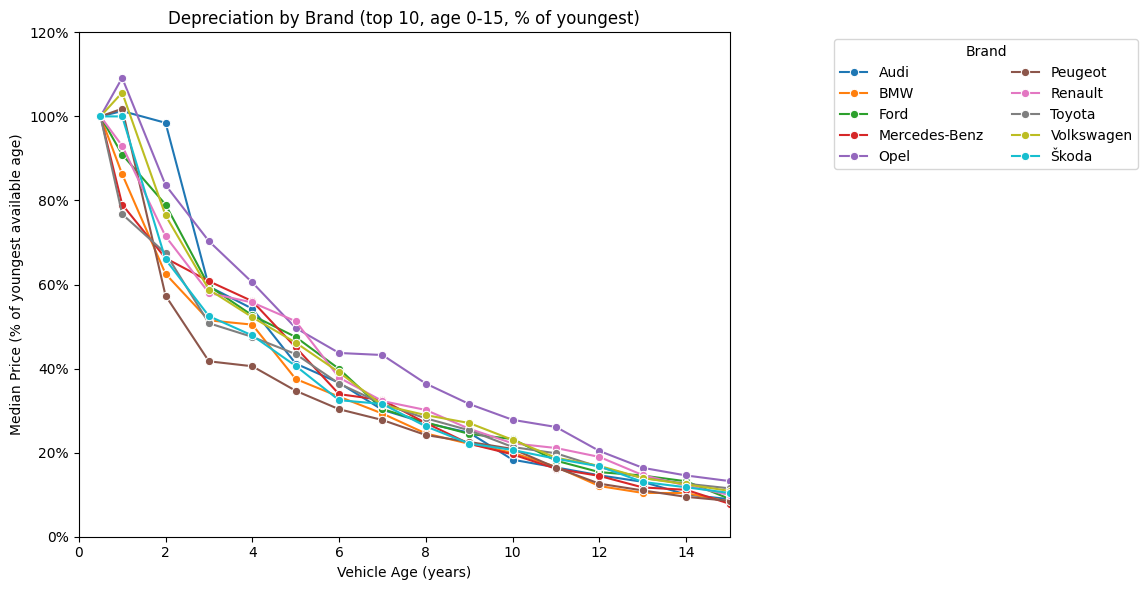

In [12]:
from matplotlib.ticker import PercentFormatter

top10_brands = df['brand'].value_counts().head(10).index
age_filtered = df[
    df['brand'].isin(top10_brands)
    & df['vehicle_age'].notna()
    & (df['vehicle_age'] >= 0)
    & (df['vehicle_age'] <= 15)
]

brand_age = (
    age_filtered.groupby(['brand', 'vehicle_age'])['price_pln']
    .median()
    .reset_index(name='median_price_pln')
)

# Use each brand's youngest available age as baseline (age 0 if present)
baseline_idx = brand_age.groupby('brand')['vehicle_age'].idxmin()
baselines = brand_age.loc[baseline_idx, ['brand', 'vehicle_age', 'median_price_pln']].rename(
    columns={'median_price_pln': 'baseline_price', 'vehicle_age': 'baseline_age'}
)
brand_age = brand_age.merge(baselines[['brand', 'baseline_price']], on='brand', how='inner')
brand_age = brand_age[brand_age['baseline_price'] > 0]
brand_age['price_pct_of_new'] = 100 * brand_age['median_price_pln'] / brand_age['baseline_price']
brand_age = brand_age.sort_values(['brand', 'vehicle_age'])

if brand_age.empty:
    raise ValueError('No data available to plot depreciation by brand and age in the 0–15 window.')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=brand_age,
    x='vehicle_age',
    y='price_pct_of_new',
    hue='brand',
    marker='o',
)
plt.xlim(0, 15)
plt.ylim(0, 120)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Median Price (% of youngest available age)')
plt.title('Depreciation by Brand (top 10, age 0-15, % of youngest)')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(title='Brand', bbox_to_anchor=(1.15, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


## First-owner price premium by brand (2018)

Median price premium (%) for first-owner listings versus non-first-owner, by brand, restricted to production year 2018. Brands must have both owner statuses and at least 30 listings; top 15 brands are shown.

/tmp/ipykernel_1263552/2057170489.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='premium_pct', y='brand', palette='coolwarm')


NameError: name 'fig_dir' is not defined

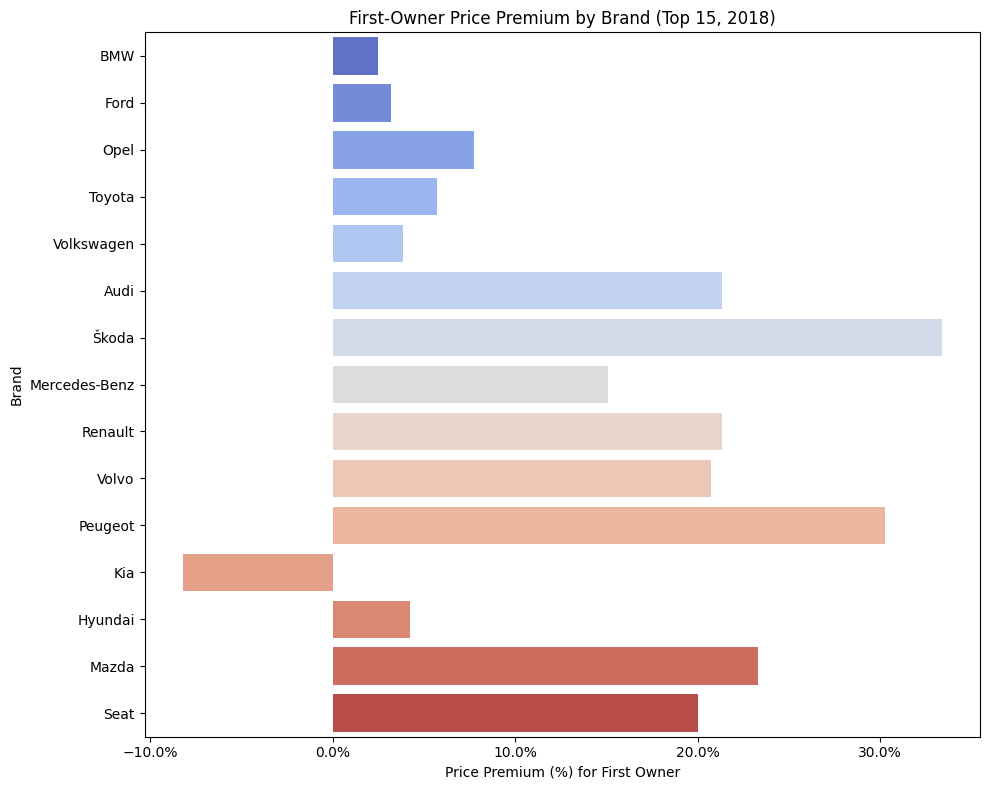

In [ ]:
from matplotlib.ticker import PercentFormatter

year_filter = 2018

if 'is_first_owner' not in df.columns:
    raise KeyError('Column is_first_owner is missing; ensure pipeline adds this flag.')
if 'production_year' not in df.columns:
    raise KeyError('Column production_year is missing; cannot filter by year.')

base = df[(df['is_first_owner'].notna()) & (df['production_year'] == year_filter)].copy()
if base.empty:
    raise ValueError(f'No rows with is_first_owner available for year {year_filter}.')

if 'brand' not in base.columns:
    raise ValueError('brand column is missing; cannot compute brand-level premium.')

# Aggregate median price by owner status within each brand
agg = (
    base.groupby(['brand', 'is_first_owner'])['price_pln']
    .median()
    .reset_index(name='median_price_pln')
)

# Keep brands that have both first-owner and non-first-owner entries
pivot = agg.pivot_table(
    index='brand',
    columns='is_first_owner',
    values='median_price_pln',
)
pivot = pivot.rename(columns={0: 'not_first_owner', 1: 'first_owner'})
pivot = pivot.dropna(subset=['first_owner', 'not_first_owner'])

if pivot.empty:
    raise ValueError(f'No brands have both first- and non-first-owner listings for year {year_filter}.')

# Add counts to filter out tiny brands
brand_counts = base.groupby('brand')['price_pln'].size().rename('count')
pivot = pivot.join(brand_counts, how='inner')
pivot = pivot[pivot['count'] >= 30]

if pivot.empty:
    raise ValueError(f'No brands meet the minimum size threshold (>=30 listings) for year {year_filter}.')

pivot['premium_pct'] = 100 * (pivot['first_owner'] / pivot['not_first_owner'] - 1)
plot_data = (
    pivot.reset_index()
    .sort_values(['count', 'premium_pct'], ascending=[False, False])
    .head(15)
)

plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, x='premium_pct', y='brand', palette='coolwarm')
plt.xlabel('Price Premium (%) for First Owner')
plt.ylabel('Brand')
plt.title(f'First-Owner Price Premium by Brand (Top 15, {year_filter})')
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

plot_data[['brand', 'count', 'premium_pct']]


## Depreciation by vehicle type (age 0–15)
Median price as a percentage of the type's youngest-available age (age 0 if present), for the top vehicle types. Filters to ages 0–15 and shows up to 6 most common types.

NameError: name 'fig_dir' is not defined

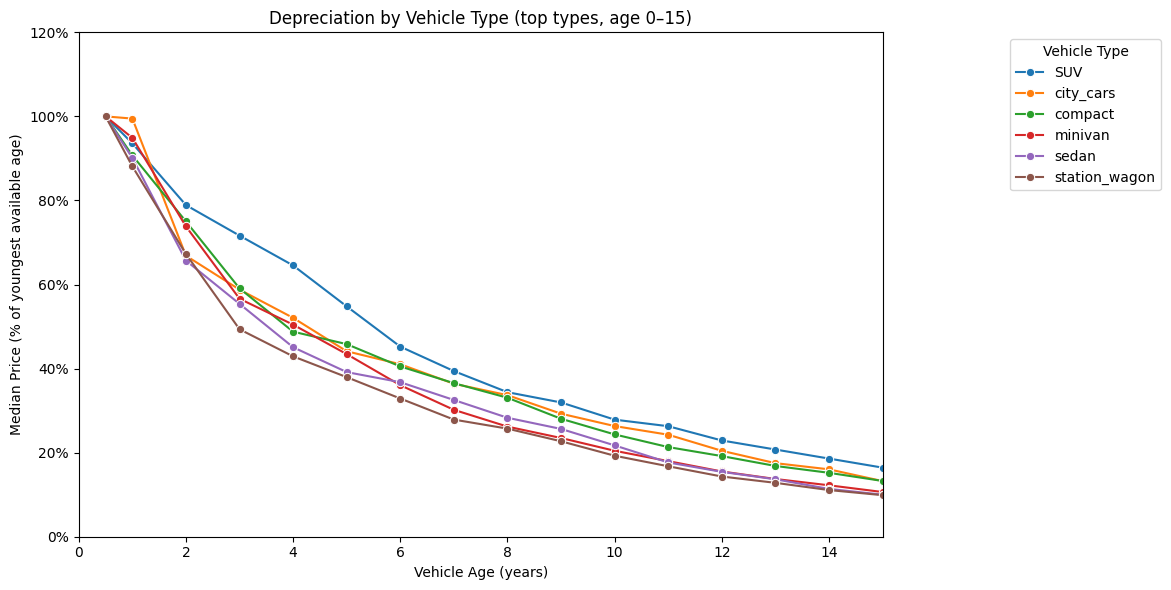

In [ ]:
from matplotlib.ticker import PercentFormatter

if 'vehicle_type' not in df.columns:
    raise KeyError('vehicle_type column is missing; cannot plot depreciation by type.')

age_filtered = df[
    df['vehicle_type'].notna()
    & df['vehicle_age'].notna()
    & (df['vehicle_age'] >= 0)
    & (df['vehicle_age'] <= 15)
]

if age_filtered.empty:
    raise ValueError('No data available for vehicle_type with ages 0–15.')

top_types = age_filtered['vehicle_type'].value_counts().head(6).index
age_filtered = age_filtered[age_filtered['vehicle_type'].isin(top_types)]

if age_filtered.empty:
    raise ValueError('No records remain after filtering to top vehicle types.')

vt_age = (
    age_filtered.groupby(['vehicle_type', 'vehicle_age'])['price_pln']
    .median()
    .reset_index(name='median_price_pln')
)

# Use each type's youngest available age as baseline (age 0 if present)
baseline_idx = vt_age.groupby('vehicle_type')['vehicle_age'].idxmin()
baselines = vt_age.loc[baseline_idx, ['vehicle_type', 'vehicle_age', 'median_price_pln']].rename(
    columns={'median_price_pln': 'baseline_price', 'vehicle_age': 'baseline_age'}
)
vt_age = vt_age.merge(baselines[['vehicle_type', 'baseline_price']], on='vehicle_type', how='inner')
vt_age = vt_age[vt_age['baseline_price'] > 0]
vt_age['price_pct_of_new'] = 100 * vt_age['median_price_pln'] / vt_age['baseline_price']
vt_age = vt_age.sort_values(['vehicle_type', 'vehicle_age'])

if vt_age.empty:
    raise ValueError('No data left to plot after baseline normalization.')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=vt_age,
    x='vehicle_age',
    y='price_pct_of_new',
    hue='vehicle_type',
    marker='o',
)
plt.xlim(0, 15)
plt.ylim(0, 120)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Median Price (% of youngest available age)')
plt.title('Depreciation by Vehicle Type (top types, age 0–15)')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.15, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Price by exterior color vs brand median (Volkswagen, 2018)

Median price per color expressed as % difference from Volkswagen's 2018 median. Requires a detected color column; keeps colors with sufficient volume.

Using color column: colour


/tmp/ipykernel_1263552/4197410339.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_stats, x='premium_pct_vs_brand', y=color_col, palette='coolwarm')


NameError: name 'fig_dir' is not defined

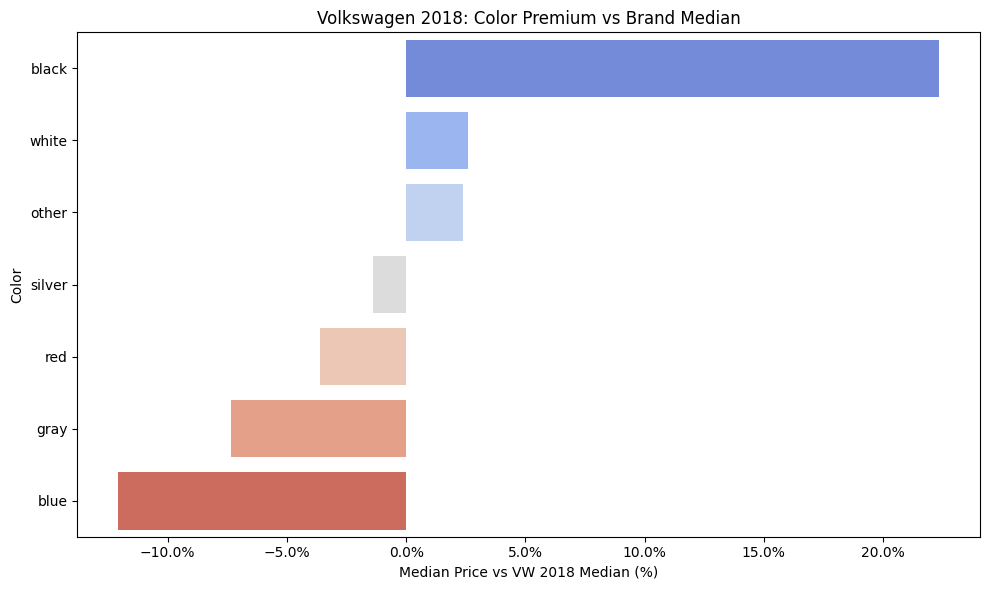

In [ ]:
from matplotlib.ticker import PercentFormatter

brand_filter = 'volkswagen'
year_filter = 2020
combo_min = 20

# Auto-detect a color column
candidate_cols = [c for c in df.columns if ('color' in c.lower()) or ('colour' in c.lower())]
if not candidate_cols:
    raise KeyError('No color/colour column found in dataframe; please add one (e.g., color, body_color, paint_color).')
color_col = candidate_cols[0]
print(f'Using color column: {color_col}')

if 'brand' not in df.columns:
    raise KeyError('brand column is missing; cannot compare against brand median.')
if 'production_year' not in df.columns:
    raise KeyError('production_year column is missing; cannot filter by year.')

base = df[
    (df['brand'].str.lower() == brand_filter)
    & (df['production_year'] == year_filter)
    & df[color_col].notna()
    & df['price_pln'].notna()
].copy()

if base.empty:
    raise ValueError(f'No rows for brand {brand_filter} and year {year_filter} with color data.')

brand_median = base['price_pln'].median()
if brand_median <= 0:
    raise ValueError('Brand median is non-positive; cannot compute percentage differences.')

color_stats = (
    base.groupby(color_col)['price_pln']
    .agg(median_price_pln='median', count='size')
    .reset_index()
)
color_stats = color_stats[color_stats['count'] >= combo_min]

if color_stats.empty:
    raise ValueError(f'No colors with at least {combo_min} listings for {brand_filter} in {year_filter}.')

color_stats['premium_pct_vs_brand'] = 100 * (color_stats['median_price_pln'] / brand_median - 1)
color_stats = color_stats.sort_values('premium_pct_vs_brand', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=color_stats, x='premium_pct_vs_brand', y=color_col, palette='coolwarm')
plt.xlabel('Median Price vs VW 2018 Median (%)')
plt.ylabel('Color')
plt.title('Volkswagen 2018: Color Premium vs Brand Median')
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

color_stats[[color_col, 'count', 'premium_pct_vs_brand']]


## Price difference by drive type
Median price per drive layout expressed as % difference vs the most common drive type; filters out sparse categories.

/tmp/ipykernel_1263552/1539298772.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drive_stats, x='premium_pct_vs_baseline', y=drive_col, palette='coolwarm')


NameError: name 'fig_dir' is not defined

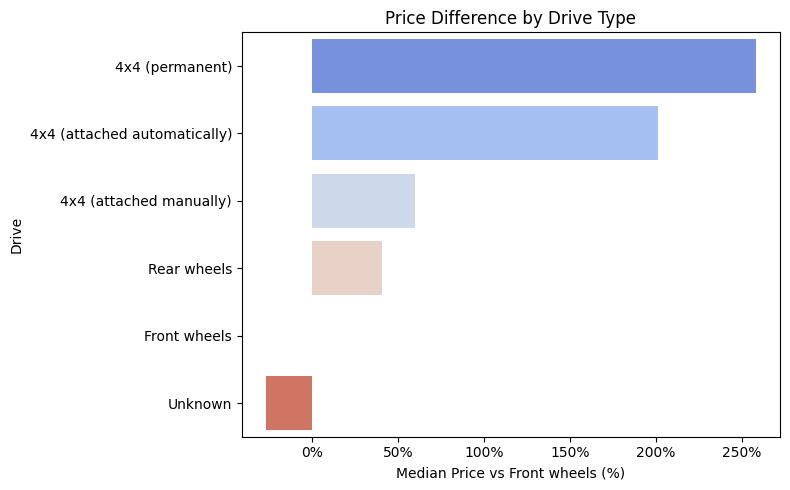

In [ ]:
from matplotlib.ticker import PercentFormatter

# Identify drive column
candidate_drive_cols = [c for c in df.columns if c.lower() == 'drive']
if not candidate_drive_cols:
    raise KeyError('drive column is missing; cannot plot price differences by drive type.')
drive_col = candidate_drive_cols[0]

combo_min = 40

drive_filtered = df[df['price_pln'].notna() & df[drive_col].notna()].copy()
if drive_filtered.empty:
    raise ValueError('No rows with both drive and price data available.')

# Aggregate median price and counts per drive type
drive_stats = (
    drive_filtered.groupby(drive_col)['price_pln']
    .agg(median_price_pln='median', count='size')
    .reset_index()
)

drive_stats = drive_stats[drive_stats['count'] >= combo_min]
if drive_stats.empty:
    raise ValueError(f'No drive types with at least {combo_min} listings.')

baseline_row = drive_stats.sort_values('count', ascending=False).iloc[0]
baseline_price = baseline_row['median_price_pln']
baseline_label = str(baseline_row[drive_col])

if baseline_price <= 0:
    raise ValueError('Baseline drive median is non-positive; cannot compute percentage differences.')

drive_stats['premium_pct_vs_baseline'] = 100 * (drive_stats['median_price_pln'] / baseline_price - 1)
drive_stats = drive_stats.sort_values('premium_pct_vs_baseline', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=drive_stats, x='premium_pct_vs_baseline', y=drive_col, palette='coolwarm')
plt.xlabel(f'Median Price vs {baseline_label} (%)')
plt.ylabel('Drive')
plt.title('Price Difference by Drive Type')
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

drive_stats[[drive_col, 'count', 'premium_pct_vs_baseline']]

## Price difference by transmission type
Median price per transmission expressed as % difference vs the most common transmission; filters out sparse categories.

/tmp/ipykernel_1263552/477797345.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trans_stats, x='premium_pct_vs_baseline', y=trans_col, palette='coolwarm')


NameError: name 'fig_dir' is not defined

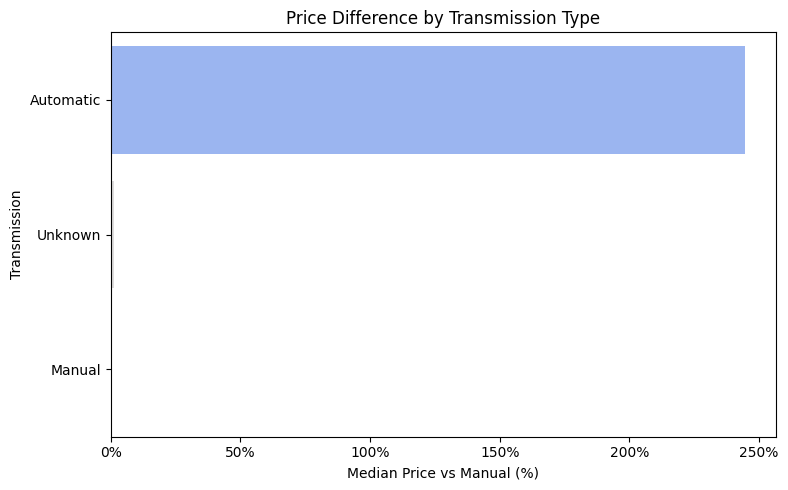

In [ ]:
from matplotlib.ticker import PercentFormatter

candidate_trans_cols = [c for c in df.columns if c.lower() == 'transmission']
if not candidate_trans_cols:
    raise KeyError('transmission column is missing; cannot plot price differences by transmission type.')
trans_col = candidate_trans_cols[0]

combo_min = 40

trans_filtered = df[df['price_pln'].notna() & df[trans_col].notna()].copy()
if trans_filtered.empty:
    raise ValueError('No rows with both transmission and price data available.')

trans_stats = (
    trans_filtered.groupby(trans_col)['price_pln']
    .agg(median_price_pln='median', count='size')
    .reset_index()
)

trans_stats = trans_stats[trans_stats['count'] >= combo_min]
if trans_stats.empty:
    raise ValueError(f'No transmission types with at least {combo_min} listings.')

baseline_row = trans_stats.sort_values('count', ascending=False).iloc[0]
baseline_price = baseline_row['median_price_pln']
baseline_label = str(baseline_row[trans_col])

if baseline_price <= 0:
    raise ValueError('Baseline transmission median is non-positive; cannot compute percentage differences.')

trans_stats['premium_pct_vs_baseline'] = 100 * (trans_stats['median_price_pln'] / baseline_price - 1)
trans_stats = trans_stats.sort_values('premium_pct_vs_baseline', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=trans_stats, x='premium_pct_vs_baseline', y=trans_col, palette='coolwarm')
plt.xlabel(f'Median Price vs {baseline_label} (%)')
plt.ylabel('Transmission')
plt.title('Price Difference by Transmission Type')
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

trans_stats[[trans_col, 'count', 'premium_pct_vs_baseline']]

## Average price: manual vs automatic
Mean price in PLN for listings labeled manual or automatic transmissions (case-insensitive); other labels are dropped.

In [32]:
import numpy as np

# Reuse detected transmission column if present
if 'trans_col' in locals():
    trans_colname = trans_col
else:
    candidate_trans_cols = [c for c in df.columns if c.lower() == 'transmission']
    if not candidate_trans_cols:
        raise KeyError('transmission column is missing; cannot compute manual vs automatic averages.')
    trans_colname = candidate_trans_cols[0]

avg_base = df[df['price_pln'].notna() & df[trans_colname].notna()].copy()
if avg_base.empty:
    raise ValueError('No rows with both transmission and price data available.')

# Normalize labels to manual/automatic; drop anything else
label = avg_base[trans_colname].str.lower().str.strip()
avg_base['trans_simple'] = np.select(
    [label.str.contains('man'), label.str.contains('auto')],
    ['manual', 'automatic'],
    default='other'
)

avg_base = avg_base[avg_base['trans_simple'].isin(['manual', 'automatic'])]
if avg_base.empty:
    raise ValueError('No manual or automatic transmission rows available after filtering.')

avg_stats = (
    avg_base.groupby('trans_simple')['price_pln']
    .agg(mean_price_pln='mean', count='size')
    .reset_index()
    .sort_values('mean_price_pln', ascending=False)
)

avg_stats

,trans_simple,mean_price_pln,count
0,automatic,107600.497112,73938
1,manual,33126.486741,132852


/tmp/ipykernel_1263552/2292589406.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stats, x='trans_simple', y='mean_price_pln', palette='Blues_r')


NameError: name 'fig_dir' is not defined

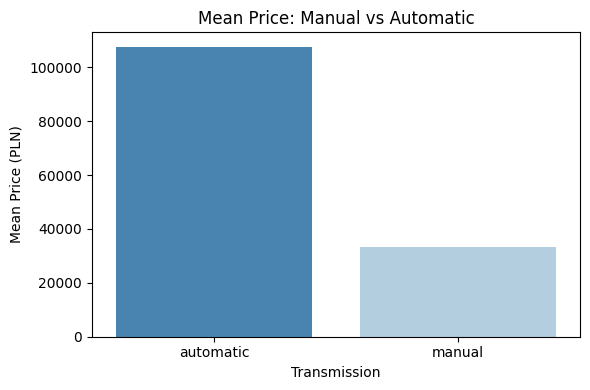

In [ ]:
# Bar plot of mean price by transmission
import seaborn as sns
import matplotlib.pyplot as plt

if 'avg_stats' not in locals() or avg_stats.empty:
    # Recompute if previous cell not run
    candidate_trans_cols = [c for c in df.columns if c.lower() == 'transmission']
    if not candidate_trans_cols:
        raise KeyError('transmission column is missing; cannot compute manual vs automatic averages.')
    trans_colname = candidate_trans_cols[0]
    tmp = df[df['price_pln'].notna() & df[trans_colname].notna()].copy()
    label = tmp[trans_colname].str.lower().str.strip()
    tmp['trans_simple'] = np.select(
        [label.str.contains('man'), label.str.contains('auto')],
        ['manual', 'automatic'],
        default='other'
    )
    tmp = tmp[tmp['trans_simple'].isin(['manual', 'automatic'])]
    if tmp.empty:
        raise ValueError('No manual or automatic transmission rows available after filtering.')
    avg_stats = (
        tmp.groupby('trans_simple')['price_pln']
        .agg(mean_price_pln='mean', count='size')
        .reset_index()
        .sort_values('mean_price_pln', ascending=False)
    )

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_stats, x='trans_simple', y='mean_price_pln', palette='Blues_r')
plt.xlabel('Transmission')
plt.ylabel('Mean Price (PLN)')
plt.title('Mean Price: Manual vs Automatic')
plt.tight_layout()
plt.show()

avg_stats

## Price distribution by brand (top 15)
Boxplot of log-price by brand for the 15 most common brands.

NameError: name 'fig_dir' is not defined

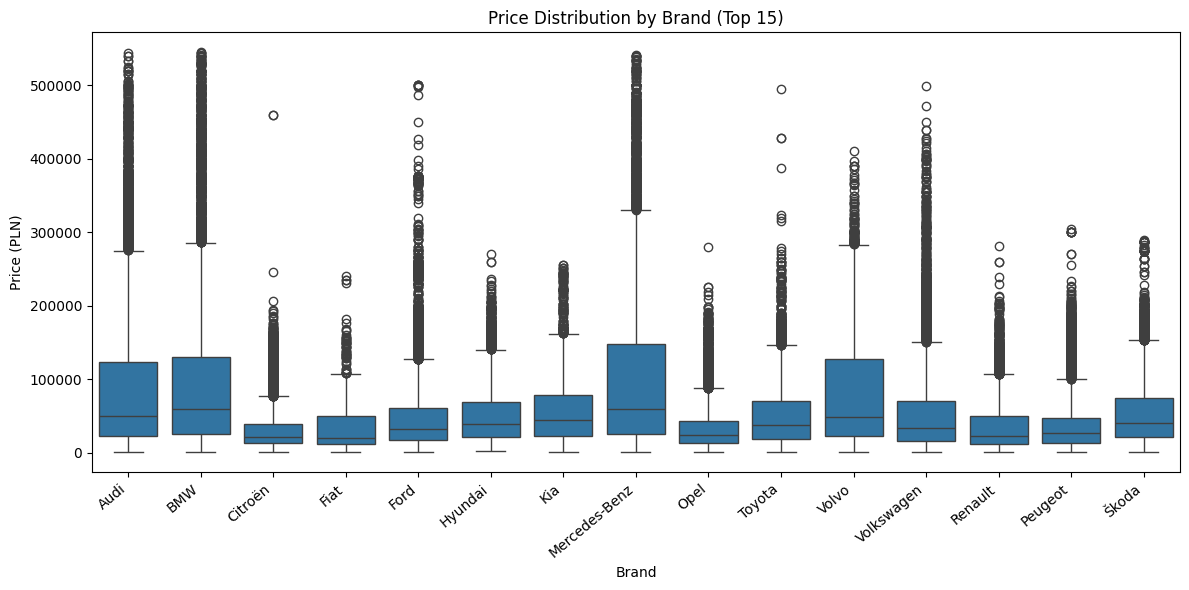

In [ ]:
top_brands = df['brand'].value_counts().head(15).index
brand_filtered = df[df['brand'].isin(top_brands)]

if brand_filtered.empty:
    raise ValueError('No data available for the selected brands.')

plt.figure(figsize=(12, 6))
sns.boxplot(data=brand_filtered, x='brand', y='price_pln')
plt.xticks(rotation=40, ha='right')
plt.xlabel('Brand')
plt.ylabel('Price (PLN)')
plt.title('Price Distribution by Brand (Top 15)')
plt.tight_layout()
plt.show()


## Brand price clusters (cheap / medium / premium)
Cluster brands into three price tiers based on brand-level median price; requires a minimum listing count for stability and plots colored bars.

NameError: name 'fig_dir' is not defined

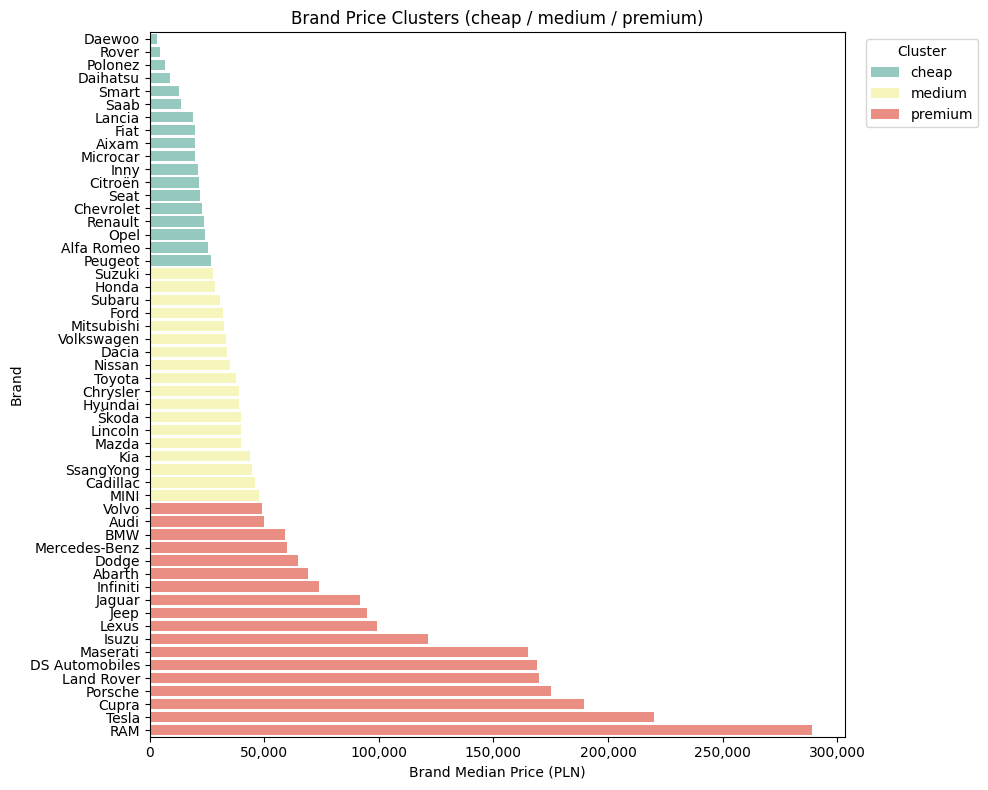

In [35]:
import numpy as np
from matplotlib.ticker import StrMethodFormatter

min_listings = 50

if 'brand' not in df.columns:
    raise KeyError('brand column is missing; cannot cluster by brand price.')

brand_stats = (
    df[df['price_pln'].notna() & df['brand'].notna()]
    .groupby('brand')['price_pln']
    .agg(median_price_pln='median', count='size')
    .reset_index()
)

brand_stats = brand_stats[brand_stats['count'] >= min_listings]
if brand_stats.empty:
    raise ValueError(f'No brands with at least {min_listings} listings to cluster.')

# Tertile-based clustering on median price
clusters = pd.qcut(
    brand_stats['median_price_pln'],
    q=3,
    labels=['cheap', 'medium', 'premium'],
    duplicates='drop',
)

if clusters.nunique() < 3:
    raise ValueError('Not enough distinct brand medians to form 3 clusters.')

brand_stats['price_cluster'] = clusters.astype(str)

palette = {
    'cheap': '#8dd3c7',
    'medium': '#ffffb3',
    'premium': '#fb8072',
}

brand_stats = brand_stats.sort_values('median_price_pln', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=brand_stats,
    x='median_price_pln',
    y='brand',
    hue='price_cluster',
    dodge=False,
    palette=palette,
)
plt.xlabel('Brand Median Price (PLN)')
plt.ylabel('Brand')
plt.title('Brand Price Clusters (cheap / medium / premium)')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig(fig_dir / 'brand_price_clusters.png', bbox_inches='tight')
plt.show()

brand_stats[['brand', 'count', 'median_price_pln', 'price_cluster']]


## Brand price clusters via k-means (k=3)
Cluster brands on their median price using k-means into cheap/medium/premium tiers (min 50 listings per brand).

NameError: name 'fig_dir' is not defined

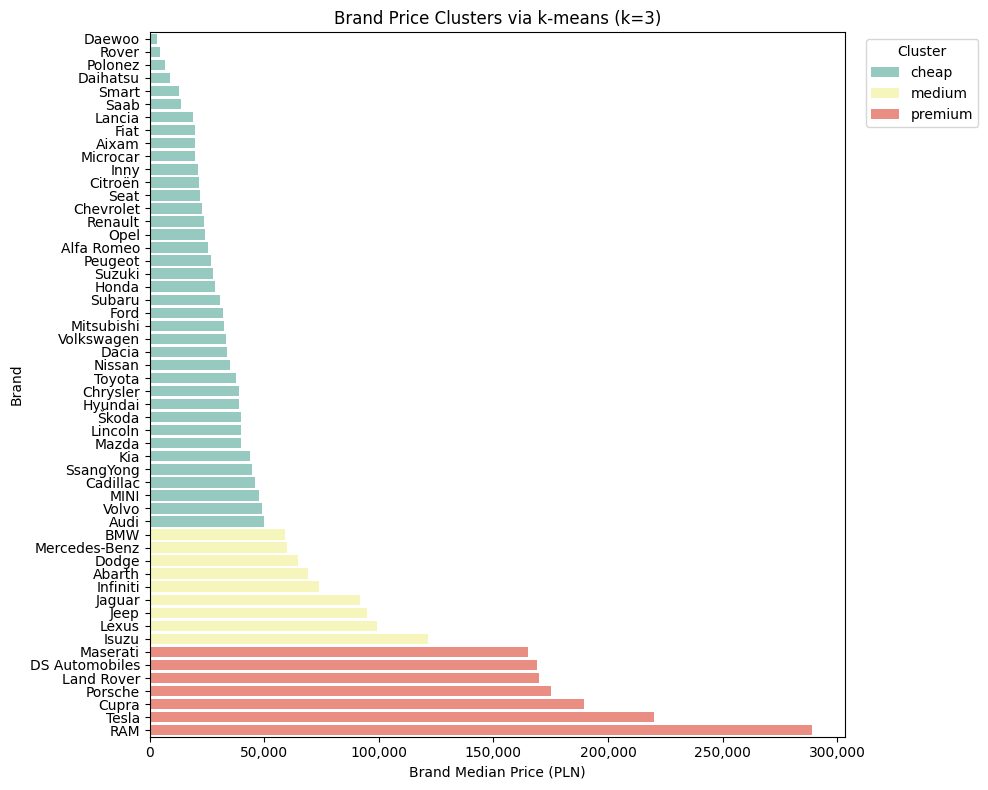

In [36]:
from sklearn.cluster import KMeans
from matplotlib.ticker import StrMethodFormatter

min_listings = 50

brand_stats = (
    df[df['price_pln'].notna() & df['brand'].notna()]
    .groupby('brand')['price_pln']
    .agg(median_price_pln='median', count='size')
    .reset_index()
)

brand_stats = brand_stats[brand_stats['count'] >= min_listings]
if brand_stats.empty:
    raise ValueError(f'No brands with at least {min_listings} listings to cluster.')

X = brand_stats[['median_price_pln']].to_numpy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Order clusters by median price to map to tiers
cluster_order = (
    brand_stats.assign(cluster=labels)
    .groupby('cluster')['median_price_pln']
    .median()
    .sort_values()
)
cluster_rank = {cluster: rank for rank, cluster in enumerate(cluster_order.index)}
rank_to_tier = {0: 'cheap', 1: 'medium', 2: 'premium'}
brand_stats['cluster_id'] = labels
brand_stats['cluster_rank'] = brand_stats['cluster_id'].map(cluster_rank)
brand_stats['cluster_tier'] = brand_stats['cluster_rank'].map(rank_to_tier)

palette = {
    'cheap': '#8dd3c7',
    'medium': '#ffffb3',
    'premium': '#fb8072',
}

brand_stats = brand_stats.sort_values('median_price_pln')

plt.figure(figsize=(10, 8))
sns.barplot(
    data=brand_stats,
    x='median_price_pln',
    y='brand',
    hue='cluster_tier',
    dodge=False,
    palette=palette,
)
plt.xlabel('Brand Median Price (PLN)')
plt.ylabel('Brand')
plt.title('Brand Price Clusters via k-means (k=3)')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig(fig_dir / 'brand_price_clusters_kmeans.png', bbox_inches='tight')
plt.show()

brand_stats[['brand', 'count', 'median_price_pln', 'cluster_tier']]